# Embedding Visualization (Only used for small batch of data)

# Loading the embedding from the language model

In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.io as io
import pickle

import pandas as pd
import re
import umap
import umap.plot
from datasets import load_dataset


2024-01-30 10:47:16.308429: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-30 10:47:16.308462: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
split = "train"
embedding = "Parnet"
sparse = io.mmread(f'../../data/{embedding}_{split}_feature_table.mtx')
df = pd.DataFrame.sparse.from_spmatrix(sparse)


In [3]:
df.shape

(19368, 256)

In [4]:
labels = pickle.load(open(f"../../data/{embedding}_{split}_labels.pkl", "rb"))
Rlabels = pickle.load(open(f"../../data/{embedding}_{split}_Rlabels.pkl","rb"))
df["Labels"]=labels
df["RLabels"] = Rlabels

/tmp/ipykernel_320057/2307369475.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Labels"]=labels
/tmp/ipykernel_320057/2307369475.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["RLabels"] = Rlabels


In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,Labels,RLabels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.789135,0.0,0.0,...,0.0,4.753513,3.632980,3.290036,5.144185,0.0,0.0,2.806466,5UTR,mRNA
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,3.896979,4.790767,5.171320,6.543217,0.0,0.0,2.736729,5UTR,mRNA
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.934844,0.0,0.0,...,0.0,5.464787,3.066936,3.828139,6.879265,0.0,0.0,2.656309,5UTR,mRNA
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.901002,0.0,0.0,...,0.0,5.166688,4.175682,3.847204,6.026468,0.0,0.0,2.754775,5UTR,mRNA
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,5.639934,5.192159,3.850579,7.023696,0.0,0.0,2.739748,5UTR,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19363,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,5.337991,5.134064,3.798003,3.016520,0.0,0.0,1.987688,Random,mRNA
19364,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008420,0.0,0.0,...,0.0,5.416637,4.973930,3.707994,3.269392,0.0,0.0,2.014318,Random,mRNA
19365,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.127504,0.0,0.0,...,0.0,5.196063,4.840807,3.817926,4.656875,0.0,0.0,2.033703,Random,mRNA
19366,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.343709,0.0,0.0,...,0.0,5.369035,4.712373,3.873856,4.995670,0.0,0.0,2.010738,Random,mRNA


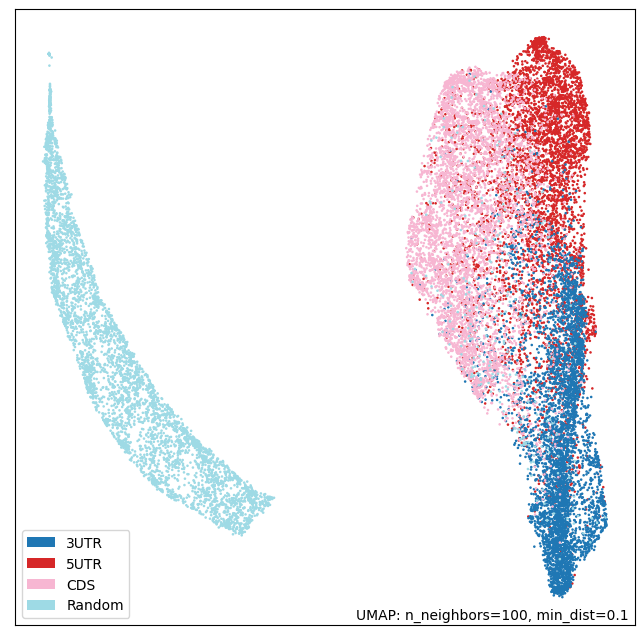

In [6]:
mapper = umap.UMAP(n_neighbors = 100, min_dist = 0.1).fit(df.loc[:, ~df.columns.isin(["Labels", "RLabels"])])
fig = umap.plot.points(mapper, labels=df["Labels"], color_key_cmap='tab20')
fig.figure.savefig(f"/home/sxr280/BERTLocRNA/output/RNAlocalization/Figure/{embedding}_{split}_adjumap.png", dpi = 300)


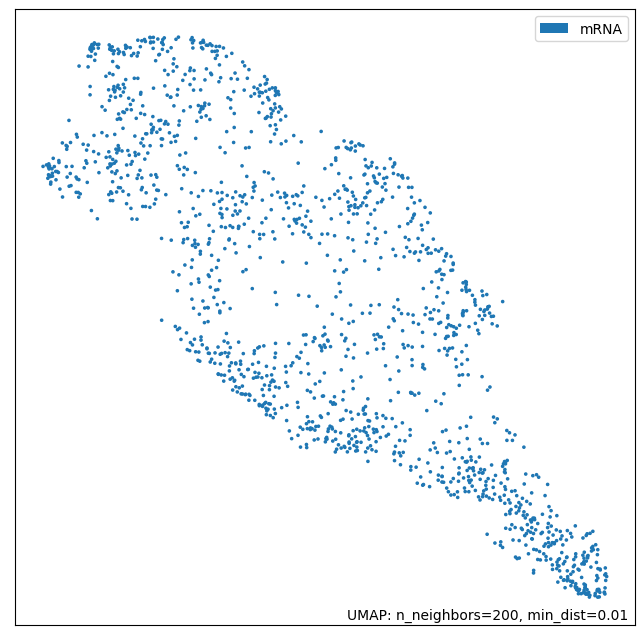

In [21]:
mapper = umap.UMAP(n_neighbors = 200, min_dist = 0.01).fit(df.loc[:, ~df.columns.isin(["Labels", "RLabels"])])
fig = umap.plot.points(mapper, labels=df["RLabels"], color_key_cmap='tab20')
fig.figure.savefig(f"/home/sxr280/BERTLocRNA/output/RNAlocalization/Figure/{embedding}_{split}_adjumap.png", dpi = 300)


In [3]:
split = "train"
embedding = "RNAFM"
sparse = io.mmread(f'../../data/{embedding}_{split}_feature_table.mtx')
df = pd.DataFrame.sparse.from_spmatrix(sparse)


In [4]:
labels = pickle.load(open(f"../../data/{embedding}_{split}_labels.pkl", "rb"))
Rlabels = pickle.load(open(f"../../data/{embedding}_{split}_Rlabels.pkl","rb"))
df["Labels"]=labels
df["RLabels"] = Rlabels

/tmp/ipykernel_3670464/2307369475.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Labels"]=labels
/tmp/ipykernel_3670464/2307369475.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["RLabels"] = Rlabels


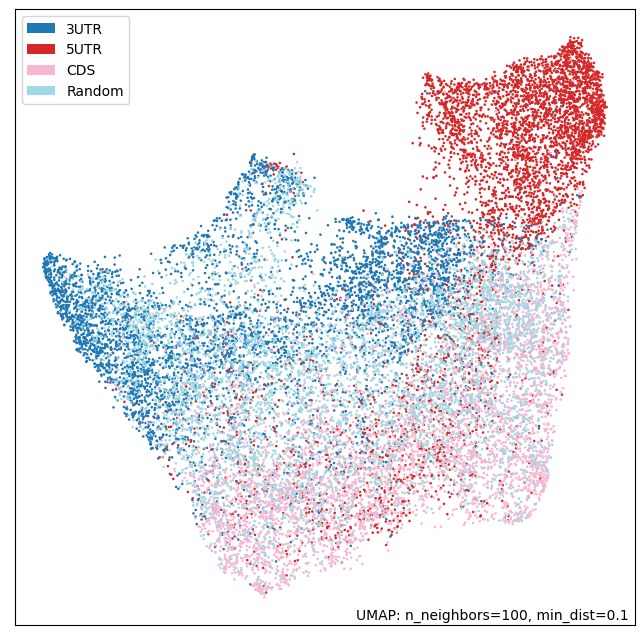

In [5]:
mapper = umap.UMAP(n_neighbors = 100, min_dist = 0.1).fit(df.loc[:, ~df.columns.isin(["Labels", "RLabels"])])
fig = umap.plot.points(mapper, labels=df["Labels"], color_key_cmap='tab20')
fig.figure.savefig(f"/home/sxr280/BERTLocRNA/output/RNAlocalization/Figure/{embedding}_{split}_adjumap.png", dpi = 300)


In [ ]:
def adj_umap(split, embedding):
    # split = "train"
    # embedding = "NT"
    sparse = io.mmread(f'../../data/{embedding}_{split}_feature_table.mtx')
    df = pd.DataFrame.sparse.from_spmatrix(sparse)
    labels = pickle.load(open(f"../../data/{embedding}_{split}_labels.pkl", "rb"))
    Rlabels = pickle.load(open(f"../../data/{embedding}_{split}_Rlabels.pkl","rb"))
    df["Labels"]=labels
    df["RLabels"] = Rlabels
    mapper = umap.UMAP(n_neighbors = 100, min_dist = 0.1).fit(df.loc[:, ~df.columns.isin(["Labels", "RLabels"])])
    fig = umap.plot.points(mapper, labels=df["Labels"], color_key_cmap='tab20')
    fig.figure.savefig(f"/home/sxr280/BERTLocRNA/output/RNAlocalization/Figure/{embedding}_{split}_adjumap.png", dpi = 300)



In [ ]:
adj_umap(split = "train", embedding = "NT")